# Probability & Statistics Simulations - Explanations

### 1️⃣ Coin Toss & Dice Roll
- Toss a coin 10,000 times → count heads & tails.

  **Probability formula:**   $P(E) = \frac{\text{favorable outcomes}}{\text{total trials}}$  

- Roll two dice → count how often sum = 7.  

  **Probability formula:** $P(\text{sum}=7) = \frac{\#\text{times sum=7}}{\text{total rolls}}$

---




In [ ]:
import random

# (a) Tossing a coin 10,000 times
num_trials = 10000
heads = 0
tails = 0

for _ in range(num_trials):
    toss = random.choice(['H', 'T'])
    if toss == 'H':
        heads += 1
    else:
        tails += 1

p_heads = heads / num_trials
p_tails = tails / num_trials

print("Coin Toss Simulation:")
print(f"Probability of Heads: {p_heads:.3f}")
print(f"Probability of Tails: {p_tails:.3f}")

# (b) Rolling two dice and computing probability of sum = 7
num_trials = 10000
sum_7 = 0

for _ in range(num_trials):
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    if die1 + die2 == 7:
        sum_7 += 1

p_sum_7 = sum_7 / num_trials
print("\nDice Roll Simulation:")
print(f"Probability of getting sum = 7: {p_sum_7:.3f}")



Coin Toss Simulation:
Probability of Heads: 0.500
Probability of Tails: 0.500

Dice Roll Simulation:
Probability of getting sum = 7: 0.165


### 2️⃣ At Least One “6” in 10 Rolls
- Roll a die 10 times and check if at least one 6 appears.  

  **Probability formula:** $P(\text{at least one 6}) = \frac{\#\text{successful trials}}{\text{total trials}}$  

  or using complement: $P(\text{at least one 6}) = 1 - \left(\frac{5}{6}\right)^{10}$

---


In [11]:
def prob_at_least_one_six(trials=10000):
    success = 0

    for _ in range(trials):
        # Roll 10 times
        rolls = [random.randint(1, 6) for _ in range(10)]
        if 6 in rolls:
            success += 1

    return success / trials

p = prob_at_least_one_six()
print(f"Estimated Probability of at least one '6' in 10 rolls: {p:.3f}")



Estimated Probability of at least one '6' in 10 rolls: 0.835



### 3️⃣ Conditional Probability
- Draw balls with replacement → count Red after Blue.  

  **Conditional probability formula:** $P(\text{Red | Blue}) = \frac{\#\text{times Red occurs after Blue}}{\#\text{times Blue occurred previously}}$

---


In [12]:
colors = ['red'] * 5 + ['green'] * 7 + ['blue'] * 8
draws = []

# Simulate 1000 draws with replacement
for _ in range(1000):
    draws.append(random.choice(colors))

# Compute P(Red | Previous Blue)
count_blue_then_red = 0
count_prev_blue = 0

for i in range(1, len(draws)):
    if draws[i-1] == 'blue':
        count_prev_blue += 1
        if draws[i] == 'red':
            count_blue_then_red += 1

p_red_given_blue = count_blue_then_red / count_prev_blue
print(f"P(Red | Previous Blue) ≈ {p_red_given_blue:.3f}")

# Verifying Bayes' theorem approximately
# Theoretical P(Red) = 5/20 = 0.25
# Theoretical P(Blue) = 8/20 = 0.4
# Since draws are independent, P(Red|Blue) ≈ P(Red)

print(f"Expected Theoretical P(Red): 0.25")


P(Red | Previous Blue) ≈ 0.236
Expected Theoretical P(Red): 0.25


### 4️⃣ Discrete Random Variable

- Sample 1000 values of $X$ with $P(X=1,2,3)=0.25,0.35,0.4$.  

  **Mean formula:** $\bar{X} = \frac{\sum X_i}{n}$  

  **Variance formula:** $Var(X) = \frac{\sum (X_i - \bar{X})^2}{n}$  

  **Standard deviation:** $SD = \sqrt{Var(X)}$

---


In [13]:
import numpy as np

values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]

# Generate 1000 samples
sample = np.random.choice(values, size=1000, p=probabilities)

mean = np.mean(sample)
variance = np.var(sample)
std_dev = np.std(sample)

print("Discrete Random Variable Simulation:")
print(f"Empirical Mean: {mean:.3f}")
print(f"Empirical Variance: {variance:.3f}")
print(f"Empirical Standard Deviation: {std_dev:.3f}")



Discrete Random Variable Simulation:
Empirical Mean: 2.134
Empirical Variance: 0.656
Empirical Standard Deviation: 0.810


### 5️⃣ Exponential Distribution
- Generate 2000 samples with mean = 5 using inverse transform method.  

  **Exponential sample formula:** $X = -\frac{\ln(1-U)}{\lambda}$, where $\lambda = 1/\text{mean}$  

- Compute mean and variance from samples.
---


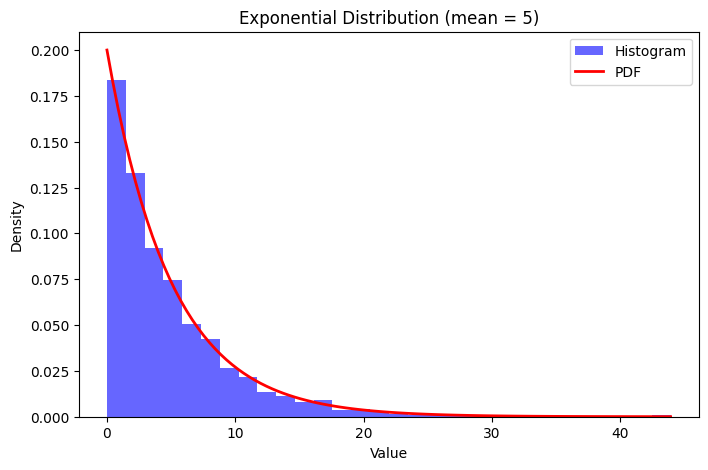

In [18]:
import matplotlib.pyplot as plt

# Mean = 5 -> scale parameter = 5
samples = np.random.exponential(scale=5, size=2000)

plt.figure(figsize=(8, 5))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='blue', label="Histogram")

# Overlay PDF
x = np.linspace(0, max(samples), 100)
pdf = (1/5) * np.exp(-x/5)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

plt.title("Exponential Distribution (mean = 5)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()


### 6️⃣ Central Limit Theorem

- Take 1000 samples of size $n=30$ from uniform(0,1) → compute sample means.  

  **Sample mean formula:** $\bar{X} = \frac{\sum X_i}{n}$  

  **Variance of means:** $Var(\bar{X}) = \frac{\sum (\bar{X}_i - \mu)^2}{N}$  

- Distribution of sample means → approximately normal even if original data is uniform.
---

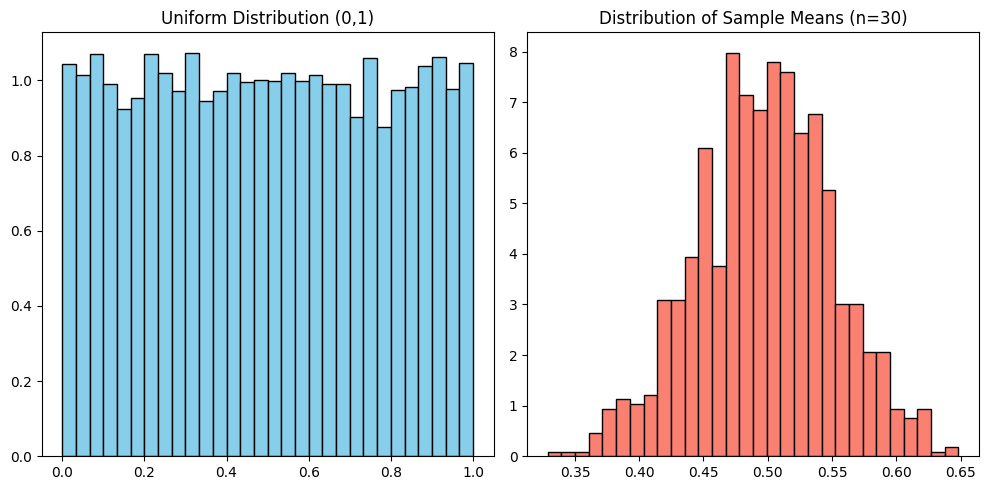

In [17]:
# Generate 10,000 uniform random numbers
uniform_data = np.random.uniform(0, 1, 10000)

# Draw 1000 samples of size n = 30 and compute sample means
sample_means = [np.mean(np.random.choice(uniform_data, 30)) for _ in range(1000)]

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(uniform_data, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("Uniform Distribution (0,1)")

plt.subplot(1, 2, 2)
plt.hist(sample_means, bins=30, color='salmon', edgecolor='black', density=True)
plt.title("Distribution of Sample Means (n=30)")

plt.tight_layout()
plt.show()
